# The MICHDA classification project
## ML course (CS-433)
Andrea Belvisi, Michelangelo D'Andrea, Matteo Ferrazzi

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from implementations import *
from feat_eng import *
from helpers import *
from model_selectors_predictors import *

#Set figure and random seed
sns.set(rc={'figure.figsize':(15,8)})
np.random.seed(1)

### Main code:

In [2]:
# Download datasets
data_tuples=np.genfromtxt('dataset_to_release/x_train.csv', delimiter=',',names=True)
data=np.array(data_tuples.tolist())
data=data[:,1:]
names = list(data_tuples.dtype.names)
names = names[1:]
x_train, x_test, y_train, train_ids, test_ids = load_csv_data('dataset_to_release', sub_sample=False)
y_train = y_train/2 + 0.5

In [3]:
# Create datasets with the different polynomial features. Set also maximum number of iterartions.
max_iters = 500
degrees = [1,2,3]
datas = []
k = 4
sq_root = False
for degree in degrees:
    datas.append(feat_engineering(x_train,names,degree,sq_root))

In [ ]:
#Define lists of learning rates and thresholds
rates = [0.5, 0.7, 0.9]
thresholds = [0.2, 0.3, 0.4, 0.5]

#Run Logistic Regression
accuracy_dict_log_reg, F1_score_dict_log_reg = k_fold_cross_val_logistic_regression(y_train,datas,rates,500,k,thresholds)

In [ ]:
#Define lists of learning rates and thresholds
rates = [0.01, 0.05, 0.01]
thresholds = [0.2, 0.3, 0.4, 0.5]

#Run Gradient Descent method
accuracy_dict_mean_sq_gd, F1_score_dict_mean_sq_gd = k_fold_cross_val_mean_squared_error_gd(y_train,datas,rates,thresholds,max_iters,k)

In [9]:
#Define lists of learning rates and thresholds
lambdas = [0.01, 0.001, 0.0001, 0.00001]
thresholds = np.linspace(0.1, 0.5, 41)

#Run Ridge Regression
accuracy_dict_ridge_reg, F1_score_dict_ridge_reg = k_fold_cross_val_ridge_regression(y_train,datas,lambdas,thresholds,k)

In [4]:
#Define lists of regularization parameters, learning rates and thresholds
lambdas = [0.01, 0.001, 0.0001]
rates = [0.5, 0.7, 0.9]
thresholds = [0.2, 0.3, 0.4, 0.5]

#Run Regularized Logistic Regression
accuracy_dict_log_reg_reg, F1_score_dict_log_reg_reg = k_fold_cross_val_reg_logistic_regression(y_train,datas,rates,lambdas,max_iters,k,thresholds)

GD iter. 0/499: loss=0.3424564994657376
GD iter. 100/499: loss=0.24491671539738408
GD iter. 200/499: loss=0.24546342306556215
GD iter. 300/499: loss=0.24586230225554184
GD iter. 400/499: loss=0.24606528621655852
GD iter. 500/499: loss=0.24616203805762144
GD iter. 0/499: loss=0.3448160058545077
GD iter. 100/499: loss=0.24686949052382406
GD iter. 200/499: loss=0.24740105240344773
GD iter. 300/499: loss=0.2477973914446934
GD iter. 400/499: loss=0.24800077077568955
GD iter. 500/499: loss=0.2480980198085252
GD iter. 0/499: loss=0.3448892073573255
GD iter. 100/499: loss=0.24700685700132347
GD iter. 200/499: loss=0.24753578959396563
GD iter. 300/499: loss=0.24793248988817645
GD iter. 400/499: loss=0.24813626371018696
GD iter. 500/499: loss=0.24823363249647631
GD iter. 0/499: loss=0.34553906977260085
GD iter. 100/499: loss=0.24689271445488628
GD iter. 200/499: loss=0.24742522481718537
GD iter. 300/499: loss=0.2478141131234244
GD iter. 400/499: loss=0.24801182037914327
GD iter. 500/499: loss=0.

In [ ]:
#Define lists of learning rates and thresholds. Also increase the maximum number of iterations.
rates = [0.001, 0.002, 0.003, 0.004, 0.005]
max_iters = 1000
thresholds = [0.2, 0.3, 0.4, 0.5]

#Run Stochastic Gradient Descent method
accuracy_dict_mean_sq_sgd, F1_score_dict_mean_sq_sgd = k_fold_cross_val_mean_squared_error_sgd(y_train,datas,rates,thresholds,max_iters,k)

### Extract the best F1 score from each method and the relative hyperparameters:

In [70]:
y_pred_ridge_reg, F1_ridge_reg = y_build_ridge_reg(datas, y_train, x_test, F1_score_dict_ridge_reg, names, sq_root)

In [89]:
max(F1_score_dict_ridge_reg, key=F1_score_dict_ridge_reg.get)

(2, 'ridge_regression', 0, 0.01, 0.21000000000000002)

In [94]:
max(F1_score_dict_ridge_reg.values())

0.4188141141419089

In [71]:
accuracy_dict_ridge_reg[max(F1_score_dict_ridge_reg, key=F1_score_dict_ridge_reg.get)]

0.8648269766886088

In [72]:
y_pred_log_reg_reg, F1_log_reg_reg = y_build_log_reg_reg(datas, y_train, x_test, F1_score_dict_log_reg_reg, 500, names,sq_root)

GD iter. 0/499: loss=0.559253278051117
GD iter. 100/499: loss=0.2274964383348272
GD iter. 200/499: loss=0.22523730339655038
GD iter. 300/499: loss=0.2244188538984371
GD iter. 400/499: loss=0.22405365054980694
GD iter. 500/499: loss=0.22386483657455156


In [88]:
max(F1_score_dict_log_reg_reg, key=F1_score_dict_log_reg_reg.get)

(1, 'reg_logistic_regression', 0.9, 0.0001, 0.2)

In [93]:
max(F1_score_dict_log_reg_reg.values())

0.42083346767432117

In [73]:
accuracy_dict_log_reg_reg[max(F1_score_dict_log_reg_reg, key=F1_score_dict_log_reg_reg.get)]

0.8703247131204326

In [74]:
y_pred_log_reg, F1_log_reg = y_build_log_reg(datas, y_train, x_test, F1_score_dict_log_reg, 500, names,sq_root)

GD iter. 0/499: loss=0.5590003225234951
GD iter. 100/499: loss=0.22722593538591707
GD iter. 200/499: loss=0.2248534473376591
GD iter. 300/499: loss=0.2239572782487256
GD iter. 400/499: loss=0.22353789509931016
GD iter. 500/499: loss=0.22330987966698804


In [87]:
max(F1_score_dict_log_reg, key=F1_score_dict_log_reg.get)

(1, 'logistic_regression', 0.9, 0, 0.2)

In [92]:
max(F1_score_dict_log_reg.values())

0.4210287503369354

In [75]:
accuracy_dict_log_reg[max(F1_score_dict_log_reg, key=F1_score_dict_log_reg.get)]

0.8704405192077945

In [77]:
y_pred_mean_sq_gd, F1_mean_sq_gd = y_build_mean_sq_gd(datas, y_train, x_test, F1_score_dict_mean_sq_gd, 500, names, sq_root)

GD iter. 0/499: loss=0.041728398828065165
GD iter. 100/499: loss=0.03427112474267949
GD iter. 200/499: loss=0.033922483209973264
GD iter. 300/499: loss=0.03373929750669073
GD iter. 400/499: loss=0.033625160205569514
GD iter. 500/499: loss=0.033549750397892666


In [86]:
max(F1_score_dict_mean_sq_gd, key=F1_score_dict_mean_sq_gd.get)

(2, 'mean_squared_error_gd', 0.05, 0, 0.2)

In [91]:
max(F1_score_dict_mean_sq_gd.values())

0.4140542502514272

In [78]:
accuracy_dict_mean_sq_gd[max(F1_score_dict_mean_sq_gd, key=F1_score_dict_mean_sq_gd.get)]

0.8525180164697057

In [79]:
y_pred_mean_sq_sgd, F1_mean_sq_sgd = y_build_mean_sq_sgd(datas, y_train, x_test, F1_score_dict_mean_sq_sgd, 1000, names, sq_root)

GD iter. 0/999: loss=0.044151035397016467
GD iter. 500/999: loss=0.03820073696288785
GD iter. 1000/999: loss=0.03683774298421599


In [85]:
max(F1_score_dict_mean_sq_sgd, key=F1_score_dict_mean_sq_sgd.get)

(1, 'mean_squared_error_sgd', 0.003, 0, 0.2)

In [90]:
max(F1_score_dict_mean_sq_sgd.values())

0.35581921548320444

In [16]:
accuracy_dict_mean_sq_sgd[max(F1_score_dict_mean_sq_sgd, key=F1_score_dict_mean_sq_sgd.get)]

0.825989419893958

### Create submissions for each method:

In [80]:
create_csv_submission(test_ids, y_pred_log_reg, 'log_reg.csv')

In [81]:
create_csv_submission(test_ids, y_pred_ridge_reg, 'ridge_reg.csv')

In [82]:
create_csv_submission(test_ids, y_pred_log_reg_reg, 'log_reg_reg.csv')

In [83]:
create_csv_submission(test_ids, y_pred_mean_sq_gd, 'mean_sq_gd.csv')

In [84]:
create_csv_submission(test_ids, y_pred_mean_sq_sgd, 'mean_sq_sgd.csv')

### Visualization of the results:

In [52]:
def select_from_dict_threshold(dictionary, thresholds):
    """
    A function that selects the best F1 score values relative to the thresholds given as input
    
    """
    x = []
    y = []
    for threshold in thresholds:
        temp = []
        for k,v in dictionary.items():
            if k[4] == round(threshold,2):
                temp.append(v)
        if temp != []:
            y.append(max(temp))
            x.append(threshold)
    
    return x, y

Plot the results:

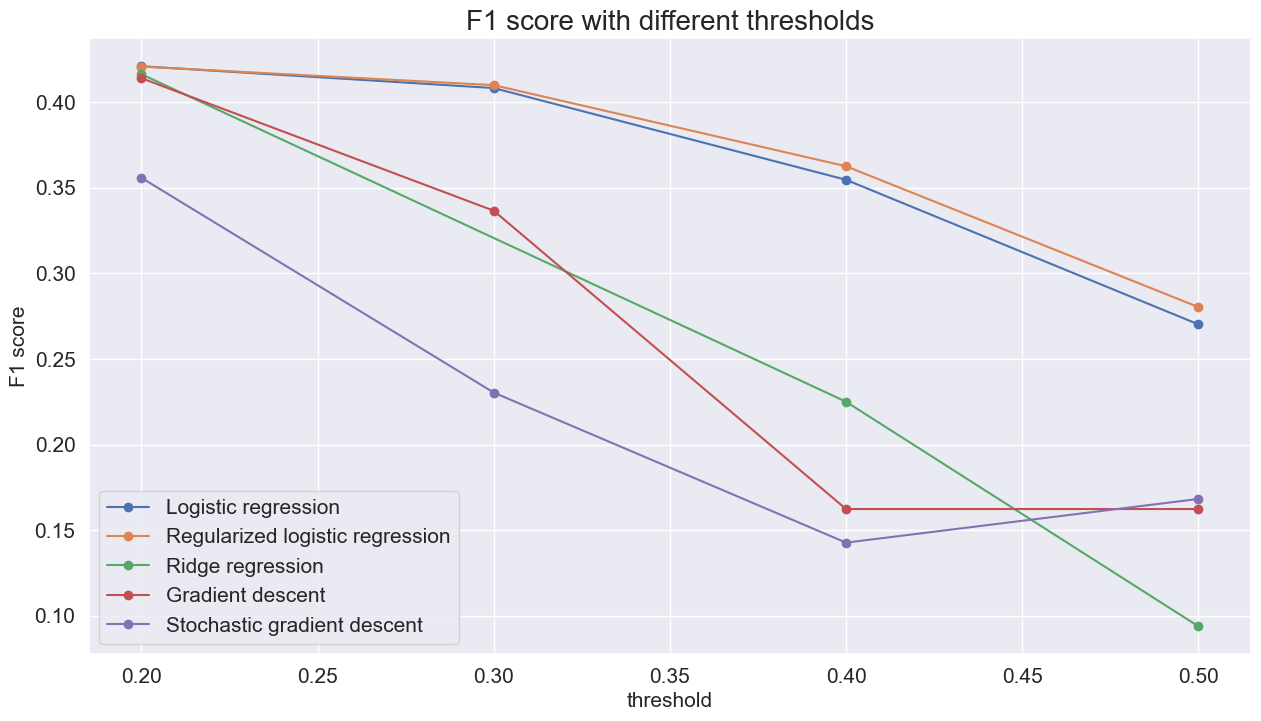

In [99]:
thresholds = [0.2, 0.3, 0.4, 0.5]
x_log_reg, y_log_reg = select_from_dict_threshold(F1_score_dict_log_reg, thresholds)
x_log_reg_reg, y_log_reg_reg = select_from_dict_threshold(F1_score_dict_log_reg_reg, thresholds)
x_ridge_reg, y_ridge_reg = select_from_dict_threshold(F1_score_dict_ridge_reg, thresholds)
x_mean_sq_gd, y_mean_sq_gd = select_from_dict_threshold(F1_score_dict_mean_sq_gd, thresholds)
x_mean_sq_sgd, y_mean_sq_sgd = select_from_dict_threshold(F1_score_dict_mean_sq_sgd, thresholds)
plt.figure()
plt.plot(x_log_reg, y_log_reg, label='Logistic regression', **{'marker': 'o'})
plt.plot(x_log_reg_reg, y_log_reg_reg, label='Regularized logistic regression', **{'marker': 'o'})
plt.plot(x_ridge_reg, y_ridge_reg, label='Ridge regression', **{'marker': 'o'})
plt.plot(x_mean_sq_gd, y_mean_sq_gd, label='Gradient descent', **{'marker': 'o'})
plt.plot(x_mean_sq_sgd, y_mean_sq_sgd, label='Stochastic gradient descent', **{'marker': 'o'})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('threshold', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.title('F1 score with different thresholds', fontsize=20)
plt.legend(fontsize=15)
plt.show()

In [54]:
def select_from_dict_degree(dictionary,degrees):
    """
    A function that selects the best F1 score values relative to the degrees given as input
    
    """
    y = []
    x = []
    for degree in degrees:
        temp = []
        for k,v in dictionary.items():
            if k[0] == degree:
                temp.append(v)
        y.append(max(temp))
        x.append(degree)
    
    return x, y

Plot the results:

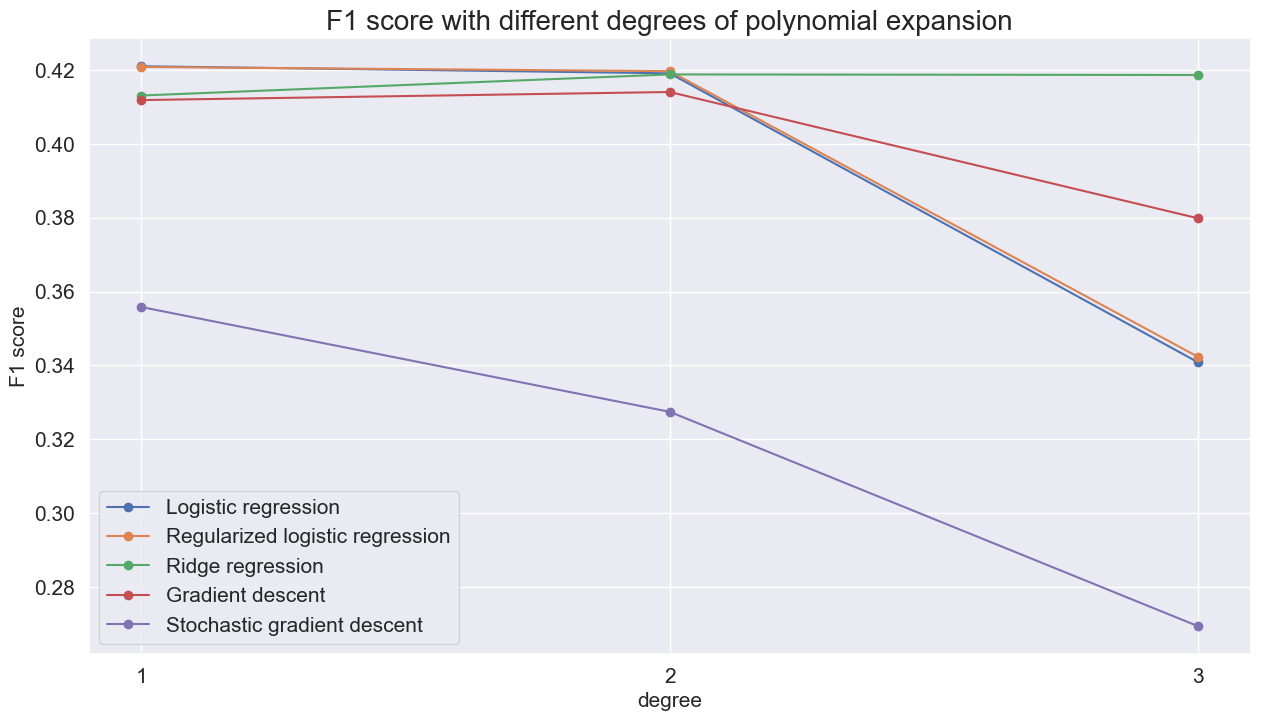

In [100]:
degrees = [1,2,3]
x_log_reg, y_log_reg = select_from_dict_degree(F1_score_dict_log_reg, degrees)
x_log_reg_reg, y_log_reg_reg = select_from_dict_degree(F1_score_dict_log_reg_reg, degrees)
x_ridge_reg, y_ridge_reg = select_from_dict_degree(F1_score_dict_ridge_reg, degrees)
x_mean_sq_gd, y_mean_sq_gd = select_from_dict_degree(F1_score_dict_mean_sq_gd, degrees)
x_mean_sq_sgd, y_mean_sq_sgd = select_from_dict_degree(F1_score_dict_mean_sq_sgd, degrees)
plt.plot(x_log_reg, y_log_reg, label='Logistic regression', **{'marker': 'o'})
plt.plot(x_log_reg_reg, y_log_reg_reg, label='Regularized logistic regression', **{'marker': 'o'})
plt.plot(x_ridge_reg, y_ridge_reg, label='Ridge regression', **{'marker': 'o'})
plt.plot(x_mean_sq_gd, y_mean_sq_gd, label='Gradient descent', **{'marker': 'o'})
plt.plot(x_mean_sq_sgd, y_mean_sq_sgd, label='Stochastic gradient descent', **{'marker': 'o'})
plt.xlabel('degree', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.xticks(degrees, fontsize=15)
plt.yticks(fontsize=15)
plt.title('F1 score with different degrees of polynomial expansion', fontsize=20)
plt.legend(fontsize=15)
plt.show()

For the best performing model in terms of F1 score, i.e. the Logistic Regression, we run the code again with more learning rates. The goal is to produce a smoother visual rapprentation of the evolution of the F1 score as a function of the learning rate.

In [45]:
rates = np.linspace(0.1, 1, 10)
thresholds = [0.2]
accuracy_plot, F1_plot = k_fold_cross_val_logistic_regression(y_train,[datas[0]],rates,500,k,thresholds)

GD iter. 0/499: loss=0.45076249342268376
GD iter. 100/499: loss=0.24207049836218966
GD iter. 200/499: loss=0.2362518456618981
GD iter. 300/499: loss=0.2335548067468465
GD iter. 400/499: loss=0.2318733074822865
GD iter. 500/499: loss=0.23068676889064677
GD iter. 0/499: loss=0.45063307189880847
GD iter. 100/499: loss=0.24129880514960625
GD iter. 200/499: loss=0.23544463465213114
GD iter. 300/499: loss=0.2327540103820412
GD iter. 400/499: loss=0.23108996635824014
GD iter. 500/499: loss=0.2299237111110982
GD iter. 0/499: loss=0.45043246109728996
GD iter. 100/499: loss=0.24139861380202823
GD iter. 200/499: loss=0.2355300285827418
GD iter. 300/499: loss=0.23281116393554502
GD iter. 400/499: loss=0.2311151575675548
GD iter. 500/499: loss=0.2299163277196306
GD iter. 0/499: loss=0.4503197994335361
GD iter. 100/499: loss=0.2409542827628973
GD iter. 200/499: loss=0.23500249297373163
GD iter. 300/499: loss=0.23223026967398963
GD iter. 400/499: loss=0.23050096782196716
GD iter. 500/499: loss=0.2292

Plot the results:

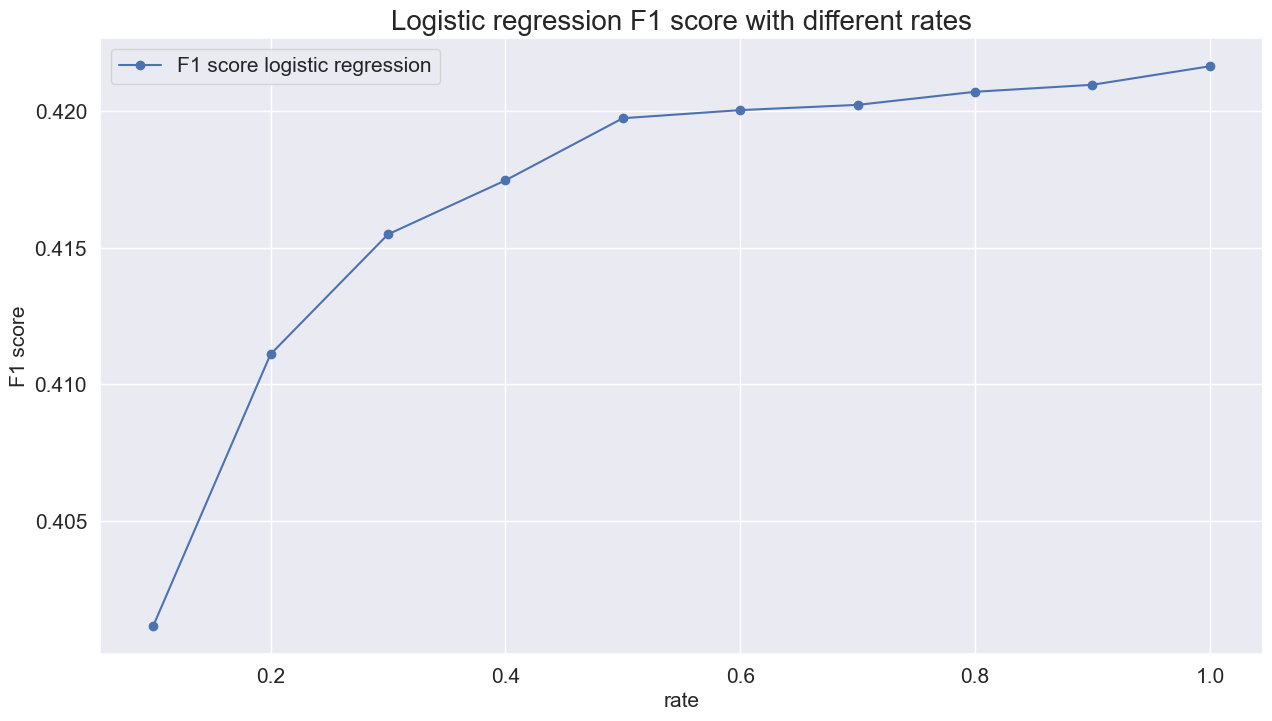

In [103]:
plt.figure()
plt.plot(rates, F1_plot.values(), label='F1 score logistic regression', **{'marker': 'o'})
plt.xlabel('rate', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Logistic regression F1 score with different rates', fontsize=20)
plt.legend(fontsize=15)
plt.show()